# Artificial Neural Networks (ANNs)

 are a cornerstone of machine learning and deep learning, inspired by the biological neural networks in human brains. 

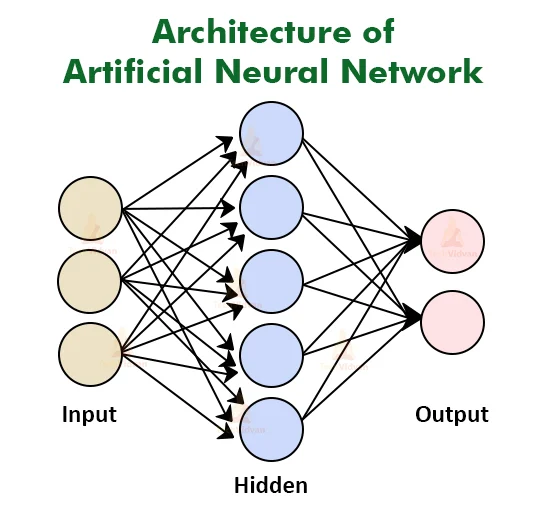

### Structure of ANNs

**1. Neurons (Nodes)**:

* Basic units of an ANN, similar to biological neurons.
* Each neuron receives inputs, processes them, and produces an output.

**2. Layers**:

* Input Layer: The first layer that receives the input data.
* Hidden Layers: Intermediate layers where computations and feature transformations occur.
* Output Layer: The final layer that produces the output.

**3. Connections (Weights)**:

* Each connection between neurons has an associated weight, representing the strength of the connection.
* Weights are adjusted during training to minimize error.

### Functioning of ANNs

**Forward Propagation**:

* Input data is fed into the network, passes through the layers, and produces an output.
* Each neuron computes a weighted sum of its inputs, applies an activation function, and passes the result to the next layer.

**Activation Functions**:

* Introduce non-linearity into the model, allowing it to learn complex patterns.
* Common activation functions include Sigmoid, Tanh, ReLU (Rectified Linear Unit), and Softmax.

**Loss Function**:

* Measures the difference between the predicted output and the actual output.
* Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.

**Backpropagation**:

* The process of adjusting weights to minimize the loss.
* Involves calculating the gradient of the loss function with respect to each weight and updating the weights using optimization algorithms like Gradient Descent.


### Types of ANNs
 
1. **Feedforward Neural Networks (FNNs)**:

* The simplest type of ANN where connections between the nodes do not form a cycle.
* Used for tasks like image classification and regression.

2. **Convolutional Neural Networks (CNNs)**:

* Designed for processing structured grid data like images.
* Use convolutional layers to automatically and adaptively learn spatial hierarchies of features from input images.

3. **Recurrent Neural Networks (RNNs)**:

* Designed for sequential data where current inputs are related to previous ones.
* Include loops allowing information to persist, useful for tasks like language modeling and time series prediction.

4. **Autoencoders**:

* Used for unsupervised learning of efficient codings.
* Consist of an encoder to compress the input into a latent-space representation and a decoder to reconstruct the input from this representation.


Let's build a Simple Feed-Forward Neural Network

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [11]:
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
data = pd.get_dummies(data, columns = ["Geography", "Gender"], drop_first = True)

In [13]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
inputs = data.drop(columns = ["Exited"])
output = data["Exited"]

In [16]:
train_inputs, test_inputs, train_output, test_output = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

In [17]:
print("train_inputs: ", train_inputs.shape)
print("test_inputs: ", test_inputs.shape)
print("train_output: ", train_output.shape)
print("test_output:", test_output.shape)

train_inputs:  (8000, 11)
test_inputs:  (2000, 11)
train_output:  (8000,)
test_output: (2000,)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
train_inputs = scaler.fit_transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

In [21]:
train_inputs

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

### Neural Network Architecture

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-04-15 10:27:56.581985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:27:56.582182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:27:56.738710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
model = Sequential()

### Hidden Layer

In [31]:
model.add(Dense(3, activation = "sigmoid", input_dim = 11))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Output Layer

In [32]:
model.add(Dense(1, activation = "sigmoid"))

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [35]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam")

### Fitting Model

In [37]:
model.fit(train_inputs, train_output, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7002
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5450
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4767
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4599
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4494
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4384
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4371
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4365
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4425
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4346


### Weights and biases of Layer 1

In [38]:
model.layers[0].get_weights()

[array([[-0.39371002,  0.00524866, -0.19396153],
        [ 0.7597843 , -1.2333289 ,  0.83082896],
        [ 0.39482835,  0.10064907, -0.1542571 ],
        [ 0.38986087, -0.14979684,  0.40277034],
        [-0.8176542 ,  0.01228392, -0.18358459],
        [ 0.20946673,  0.09904459,  0.24655718],
        [-0.20865531,  0.701946  , -0.63930583],
        [ 0.32846093, -0.07380831, -0.18734752],
        [-0.20590526, -0.6718446 ,  0.20432864],
        [-0.12269907, -0.17990415, -0.32869086],
        [-0.40984514,  0.27882934, -0.7035897 ]], dtype=float32),
 array([-0.41261682,  0.65063554, -0.53017044], dtype=float32)]

### Weights and biases of Layer 2

In [39]:
model.layers[1].get_weights()

[array([[ 0.24843664],
        [-2.1573746 ],
        [ 0.77081096]], dtype=float32),
 array([-0.60049087], dtype=float32)]

Model Prediction

In [41]:
y_log = model.predict(test_inputs)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Based upon ROC Curve decide the Ratio 

In [43]:
y_pred = np.where(y_log > 0.5, 1, 0)

### Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(test_output, y_pred)

0.811

### Fine-Tuning Model

In [33]:
model = Sequential()
model.add(Dense(11, activation = "relu", input_dim = 11))
model.add(Dense(11, activation = "relu",))
model.add(Dense(1, activation = "sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [37]:
history = model.fit(train_inputs, train_output, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4109 - val_accuracy: 0.8419 - val_loss: 0.3909
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3969 - val_accuracy: 0.8425 - val_loss: 0.3823
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8432 - loss: 0.3754 - val_accuracy: 0.8456 - val_loss: 0.3736
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3696 - val_accuracy: 0.8500 - val_loss: 0.3654
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3627 - val_accuracy: 0.8512 - val_loss: 0.3590
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.3597 - val_accuracy: 0.8544 - val_loss: 0.3546
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.3533 - val_accuracy: 0.8581 - val_loss: 0.3515
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3525 - val_accu

In [27]:
y_log = model.predict(test_inputs)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [32]:
accuracy_score(test_output, y_pred)

0.862

In [38]:
import matplotlib.pyplot as plt

### loss and train_loss plot

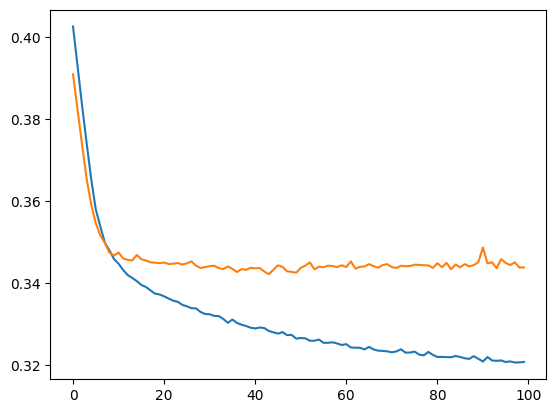

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

accuracy and train_accuracy plot

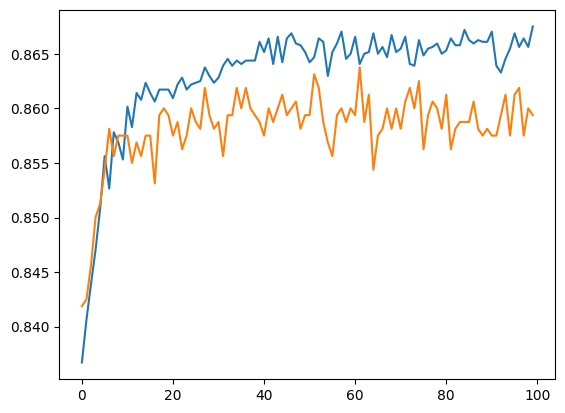

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.